In [227]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
import datetime as dt
%matplotlib inline

In [228]:
#Importing the dataset
data = pd.read_csv("data/rologolf_orders.csv")
data.dropna(subset = ["Financial Status"], inplace=True)
data.columns

Index(['Name', 'Email', 'Financial Status', 'Paid at', 'Fulfillment Status',
       'Fulfilled at', 'Accepts Marketing', 'Currency', 'Subtotal', 'Shipping',
       'Taxes', 'Total', 'Discount Code', 'Discount Amount', 'Shipping Method',
       'Created at', 'Lineitem quantity', 'Lineitem name', 'Lineitem price',
       'Lineitem compare at price', 'Lineitem sku',
       'Lineitem requires shipping', 'Lineitem taxable',
       'Lineitem fulfillment status', 'Billing Name', 'Billing Street',
       'Billing Address1', 'Billing Address2', 'Billing Company',
       'Billing City', 'Billing Zip', 'Billing Province', 'Billing Country',
       'Billing Phone', 'Shipping Name', 'Shipping Street',
       'Shipping Address1', 'Shipping Address2', 'Shipping Company',
       'Shipping City', 'Shipping Zip', 'Shipping Province',
       'Shipping Country', 'Shipping Phone', 'Notes', 'Note Attributes',
       'Cancelled at', 'Payment Method', 'Payment Reference',
       'Refunded Amount', 'Vendor', '

In [229]:
df = data[['Paid at','Subtotal','Discount Amount','Shipping']]
df.dropna(subset = ["Paid at"], inplace=True)
df.head(100)

<ipython-input-229-cdea82a3b674>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset = ["Paid at"], inplace=True)


,Paid at,Subtotal,Discount Amount,Shipping
0,2020-11-03 01:32:22 -0500,41.40,27.60,9.45
1,2020-10-29 16:04:18 -0400,82.80,55.20,14.90
3,2020-10-28 10:49:31 -0400,124.20,82.80,0.00
6,2020-10-27 22:49:10 -0400,0.00,97.38,11.29
9,2020-10-27 22:32:55 -0400,58.65,10.35,10.53
...,...,...,...,...
184,2020-08-31 12:03:36 -0400,12.69,0.00,11.40
185,2020-08-30 13:25:08 -0400,124.20,82.80,0.00
188,2020-08-30 11:04:49 -0400,12.69,0.00,9.54
189,2020-08-30 02:32:45 -0400,69.00,0.00,15.19


In [247]:
df.dtypes
df['Paid at'] = pd.to_datetime(df['Paid at'], utc=True).dt.date
df['Paid at'] = pd.to_datetime(df['Paid at'])
df['Purchase Month'] = pd.to_datetime(df['Paid at']).values.astype('datetime64[M]')
df['Total'] = df['Subtotal'] + df['Discount Amount']
current_month = df[df['Purchase Month'] == '2020-11-01'].index
df.drop(current_month, inplace=True)
df['Purchase Month Numerical'] = df['Purchase Month'].map(dt.datetime.toordinal)
df

<ipython-input-247-be6a711495db>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Paid at'] = pd.to_datetime(df['Paid at'], utc=True).dt.date
<ipython-input-247-be6a711495db>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Paid at'] = pd.to_datetime(df['Paid at'])
<ipython-input-247-be6a711495db>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

,Paid at,Subtotal,Discount Amount,Shipping,Purchase Month,Total,Purchase Month Numerical
1,2020-10-29,82.80,55.20,14.90,2020-10-01,138.00,737699
3,2020-10-28,124.20,82.80,0.00,2020-10-01,207.00,737699
6,2020-10-28,0.00,97.38,11.29,2020-10-01,97.38,737699
9,2020-10-28,58.65,10.35,10.53,2020-10-01,69.00,737699
10,2020-10-27,41.40,27.60,15.07,2020-10-01,69.00,737699
...,...,...,...,...,...,...,...
623,2019-12-27,138.00,0.00,17.44,2019-12-01,138.00,737394
625,2019-12-18,138.00,0.00,6.01,2019-12-01,138.00,737394
627,2019-12-11,51.75,17.25,10.50,2019-12-01,69.00,737394
628,2019-12-06,44.85,24.15,10.55,2019-12-01,69.00,737394


In [248]:
df.dtypes

Paid at                     datetime64[ns]
Subtotal                           float64
Discount Amount                    float64
Shipping                           float64
Purchase Month              datetime64[ns]
Total                              float64
Purchase Month Numerical             int64
dtype: object

In [249]:
grouped = df.groupby('Purchase Month')
month_data = grouped['Total'].sum().to_frame(name = 'Total').reset_index()
current_month = month_data[month_data['Purchase Month'] == '2020-11-01'].index
month_data.drop(current_month, inplace=True)
month_data['Purchase Month Numerical'] = month_data['Purchase Month'].map(dt.datetime.toordinal)
month_data

,Purchase Month,Total,Purchase Month Numerical
0,2019-12-01,483.00,737394
1,2020-01-01,966.00,737425
2,2020-02-01,483.00,737456
3,2020-03-01,759.00,737485
4,2020-04-01,483.00,737516
5,2020-05-01,2553.00,737546
6,2020-06-01,966.00,737577
7,2020-07-01,12420.00,737607
8,2020-08-01,11027.70,737638
9,2020-09-01,1556.07,737669


In [250]:
month_data.dtypes

Purchase Month              datetime64[ns]
Total                              float64
Purchase Month Numerical             int64
dtype: object

# Simple Linear Regression

Here we will estimate the sales with respect month totals

In [252]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [253]:
X = month_data['Purchase Month'].values.reshape(-1,1)
y = month_data['Total'].values.reshape(-1,1)

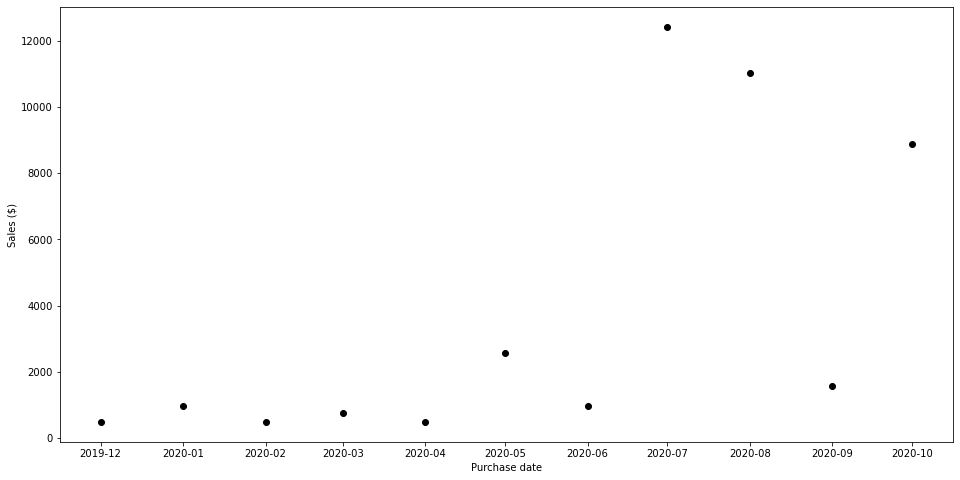

In [254]:
#Ploting a graph to see the points
plt.figure(figsize=(16, 8))
plt.scatter(X, y, c='black')
plt.xlabel("Purchase date")
plt.ylabel("Sales ($)")
plt.show()

In [255]:
#Switch X values to using numerical date column

X = month_data['Purchase Month Numerical'].values.reshape(-1,1)

#Splitting our dataset to Training and Testing dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [256]:
#Fitting Linear Regression to the training set

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

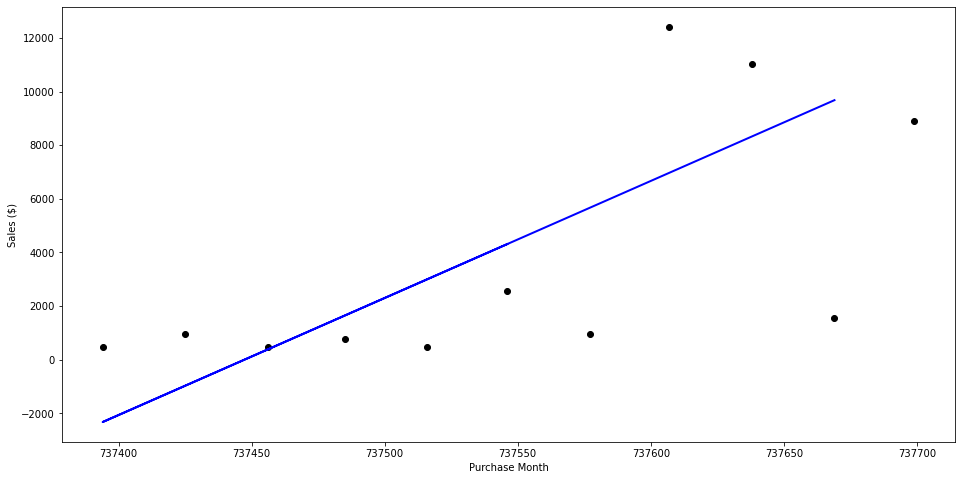

In [238]:
#predicting the Test set result
y_pred = reg.predict(X_test)
plt.figure(figsize=(16, 8))
plt.scatter(X, y, c='black')
plt.plot(
    X_test,
    y_pred,
    c='blue',
    linewidth=2
)
plt.xlabel("Purchase Month")
plt.ylabel("Sales ($)")
plt.show()

In [239]:
#Calculating the Coefficients
reg.coef_

array([[43.66185418]])

In [240]:
#Calculating the Intercept
reg.intercept_

array([-32198317.26460417])

In [241]:
#Calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-34.908367672068465

# Simple Linear Regression v2

Here we will estimate the sales using all sales not summed over a month period

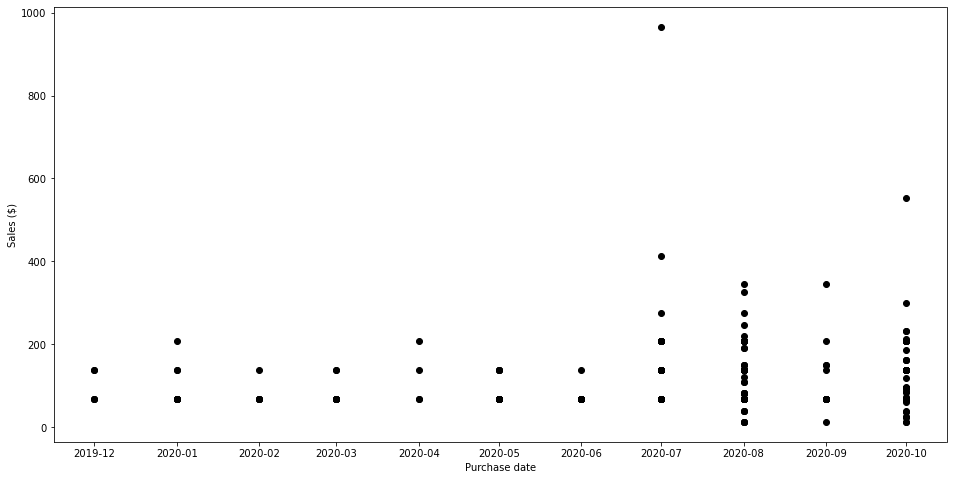

In [251]:
X2 = df['Purchase Month'].values.reshape(-1,1)
y2 = df['Total'].values.reshape(-1,1)
#Ploting a graph to see the points
plt.figure(figsize=(16, 8))
plt.scatter(X2, y2, c='black')
plt.xlabel("Purchase date")
plt.ylabel("Sales ($)")
plt.show()

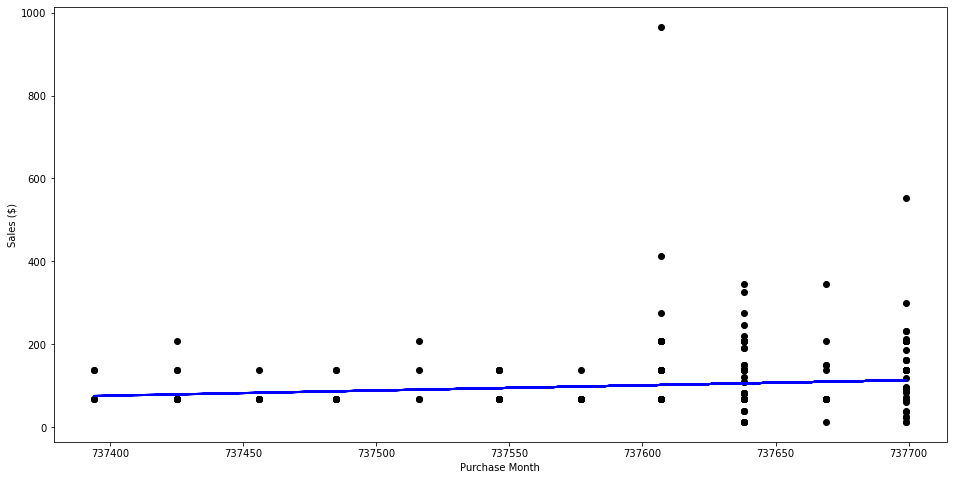

In [260]:
#Switch X values to using numerical date column

X2 = df['Purchase Month Numerical'].values.reshape(-1,1)

#Splitting our dataset to Training and Testing dataset

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

#Fitting Linear Regression to the training set

reg2 = LinearRegression()
reg2.fit(X_train2, y_train2)

#predicting the Test set result

y_pred2 = reg2.predict(X_test2)
plt.figure(figsize=(16, 8))
plt.scatter(X2, y2, c='black')
plt.plot(
    X_test2,
    y_pred2,
    c='blue',
    linewidth=2
)
plt.xlabel("Purchase Month")
plt.ylabel("Sales ($)")
plt.show()


In [263]:
#Calculating the Coefficients
reg2.coef_

array([[0.12467017]])

In [264]:
#Calculating the Intercept
reg2.intercept_

array([-91855.48650115])

In [265]:
#Calculating the R squared value
r2_score(y_test2, y_pred2)

-0.0027872840793248255

# Simple Linear Regression v3

Here we will try to use the mean sale value per month for the model

In [272]:
grouped = df.groupby('Purchase Month')
month_sale_mean = grouped['Total'].mean().to_frame(name = 'Total').reset_index()
month_sale_mean['Purchase Month Numerical'] = month_sale_mean['Purchase Month'].map(dt.datetime.toordinal)

month_sale_mean

,Purchase Month,Total,Purchase Month Numerical
0,2019-12-01,96.600000,737394
1,2020-01-01,96.600000,737425
2,2020-02-01,80.500000,737456
3,2020-03-01,84.333333,737485
4,2020-04-01,120.750000,737516
5,2020-05-01,77.363636,737546
6,2020-06-01,74.307692,737577
7,2020-07-01,108.000000,737607
8,2020-08-01,110.277000,737638
9,2020-09-01,111.147857,737669


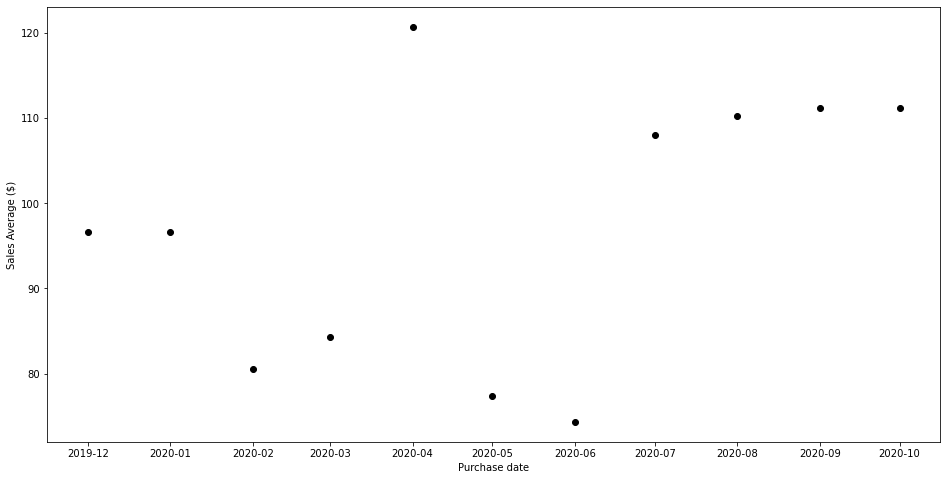

In [273]:
X3 = month_sale_mean['Purchase Month'].values.reshape(-1,1)
y3 = month_sale_mean['Total'].values.reshape(-1,1)

#Ploting a graph to see the points
plt.figure(figsize=(16, 8))
plt.scatter(X3, y3, c='black')
plt.xlabel("Purchase date")
plt.ylabel("Sales Average ($)")
plt.show()

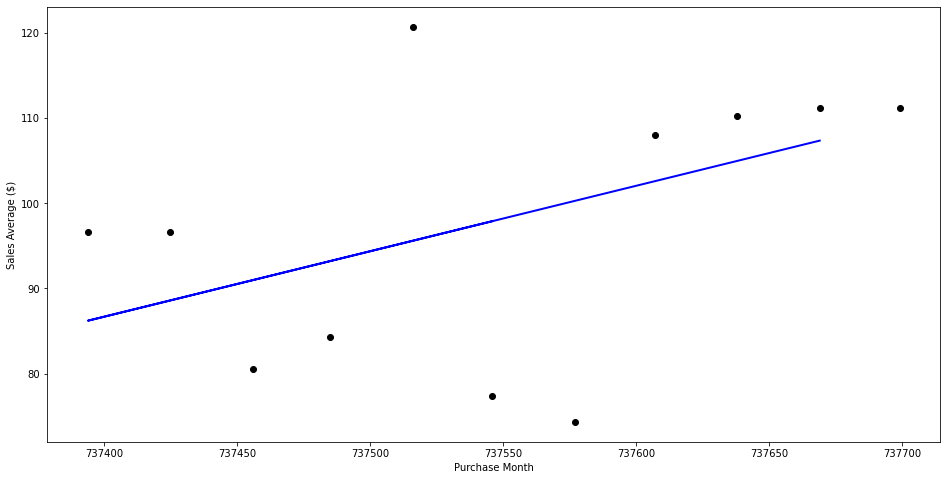

In [274]:
#Switch X values to using numerical date column

X3 = month_sale_mean['Purchase Month Numerical'].values.reshape(-1,1)

#Splitting our dataset to Training and Testing dataset

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

#Fitting Linear Regression to the training set

reg3 = LinearRegression()
reg3.fit(X_train3, y_train3)

#predicting the Test set result

y_pred3 = reg3.predict(X_test3)
plt.figure(figsize=(16, 8))
plt.scatter(X3, y3, c='black')
plt.plot(
    X_test3,
    y_pred3,
    c='blue',
    linewidth=2
)
plt.xlabel("Purchase Month")
plt.ylabel("Sales Average ($)")
plt.show()


In [275]:
#Calculating the Coefficients
reg3.coef_

array([[0.07692855]])

In [277]:
#Calculating the Intercept
reg3.intercept_

array([-56640.44029553])

In [278]:
#Calculating the R squared value
r2_score(y_test3, y_pred3)

0.05259372691769182